In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from PIL import Image


In [65]:
# Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[40000:50000,:], y_train[40000:50000]
X_train, y_train = X_train[:40000,:], y_train[:40000]
print("Training data shape: ", X_train.shape)

Training data shape:  (40000, 32, 32, 3)


In [66]:
# Normalize the data: subtract the mean image
mean = np.mean(X_train,axis=(0,1,2))
std = np.std(X_train,axis=(0,1,2))

In [67]:
# convert image
def convert_image(input_path):
    img = Image.open(input_path)
    rgb_img = img.convert('RGB')
    rgb_img = rgb_img.resize((32, 32))
    rgb_img = np.array(rgb_img)
    rgb_img = rgb_img.reshape(1, 32, 32, 3)
    return rgb_img

In [68]:
# Load the model
model = tf.keras.models.load_model('cifar10_cnn_adv3.h5')


Predict:  dog


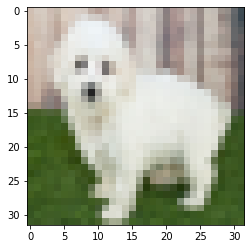

In [79]:
# Predict 
input_path = './test_img.png'
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
img = convert_image(input_path)
pred = model.predict(img, verbose=0)
pred = np.argmax(pred,axis = 1)
plt.imshow(img[0])
print('Predict: ' ,classes[pred[0]])

